In [178]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("bmh")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [179]:
from google.colab import drive

drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [180]:
df = pd.read_csv('/content/gdrive/My Drive/IIT 🎓/FYP/Dataset/processed_data.csv',
                 index_col = "Date", 
                 parse_dates = True)
df = df[(df.index < pd.to_datetime("2020-01-01"))]

df.head()

,Price,Anuradhapura_Producer_Price,Kurunegala_Producer_Price,Polonnaruwa_Producer_Price,Producer_Price,Production,Production_Total,Exchange_Rate,Fuel_Price
Date,,,,,,,,,
1996-01-01,18.07,7.75,7.90,8.18,8.18,1333.6,2065.1,53.685,12.4
1996-02-01,18.70,8.17,8.26,8.76,8.76,1333.6,2065.1,53.685,12.4
1996-03-01,18.49,7.95,7.85,7.99,7.99,1333.6,2065.1,53.685,12.4
1996-04-01,18.52,8.25,8.01,8.29,8.29,1333.6,2065.1,54.735,12.4
1996-05-01,19.02,8.38,8.50,8.34,8.34,731.5,2065.1,54.950,12.4


In [181]:
df = df.asfreq(pd.infer_freq(df.index))
df

,Price,Anuradhapura_Producer_Price,Kurunegala_Producer_Price,Polonnaruwa_Producer_Price,Producer_Price,Production,Production_Total,Exchange_Rate,Fuel_Price
Date,,,,,,,,,
1996-01-01,18.07,7.75,7.900,8.180,8.180,1333.60,2065.10,53.685,12.4
1996-02-01,18.70,8.17,8.260,8.760,8.760,1333.60,2065.10,53.685,12.4
1996-03-01,18.49,7.95,7.850,7.990,7.990,1333.60,2065.10,53.685,12.4
1996-04-01,18.52,8.25,8.010,8.290,8.290,1333.60,2065.10,54.735,12.4
1996-05-01,19.02,8.38,8.500,8.340,8.340,731.50,2065.10,54.950,12.4
...,...,...,...,...,...,...,...,...,...
2019-08-01,89.06,43.58,43.600,46.185,46.185,1519.48,4592.06,179.200,104.0
2019-09-01,92.08,45.50,46.654,49.630,49.630,1519.48,4592.06,182.000,104.0
2019-10-01,96.74,49.98,49.708,51.310,51.310,3072.58,4592.06,181.050,104.0


In [182]:
series_to_merge = ['Price', 'Producer_Price', 'Exchange_Rate']
num_of_series = len(series_to_merge)

df = df[series_to_merge]

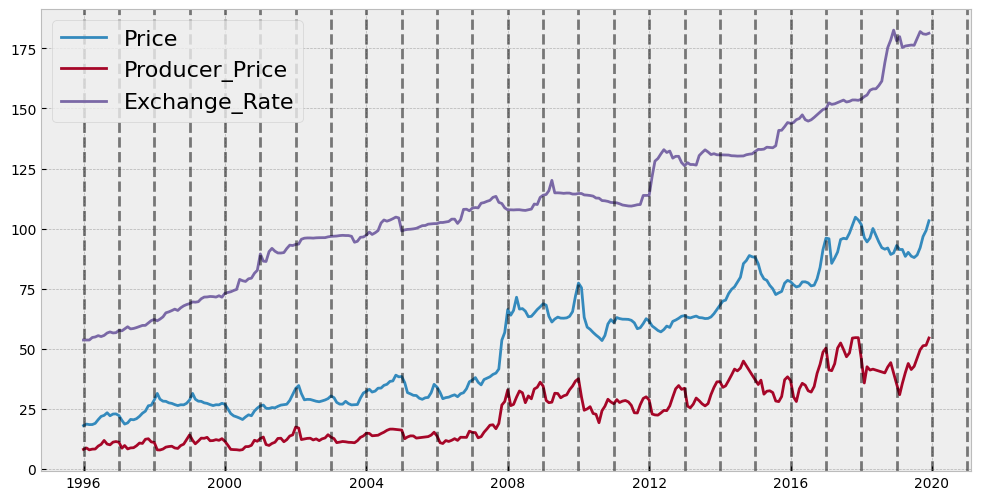

In [183]:
def plot_all_series(series_to_plot, label=None):
  plt.figure(figsize=(12,6))

  plot_arr = []

  for _ in range(num_of_series):
    plot_arr.append(None)
                
  for series in series_to_plot:
      plt.plot(df[series])

  for year in range(1996, 2022):
      plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
  if label != None:
    plt.ylabel(label, fontsize=18)

  plt.legend(series_to_plot, fontsize=16)

plot_all_series(series_to_merge)

# **bold text**

In [184]:
avgs = df.mean()
devs = df.std()

<ipython-input-185-4ce31266b5f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col] - avgs.loc[col]) / devs.loc[col]


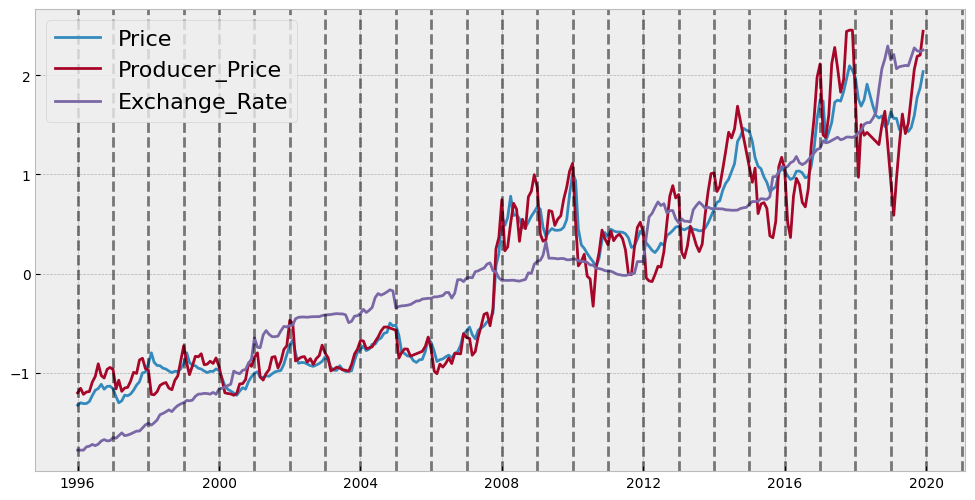

In [185]:
for col in df.columns:
    df[col] = (df[col] - avgs.loc[col]) / devs.loc[col]

plot_all_series(series_to_merge)

In [186]:
df = df.diff().dropna()

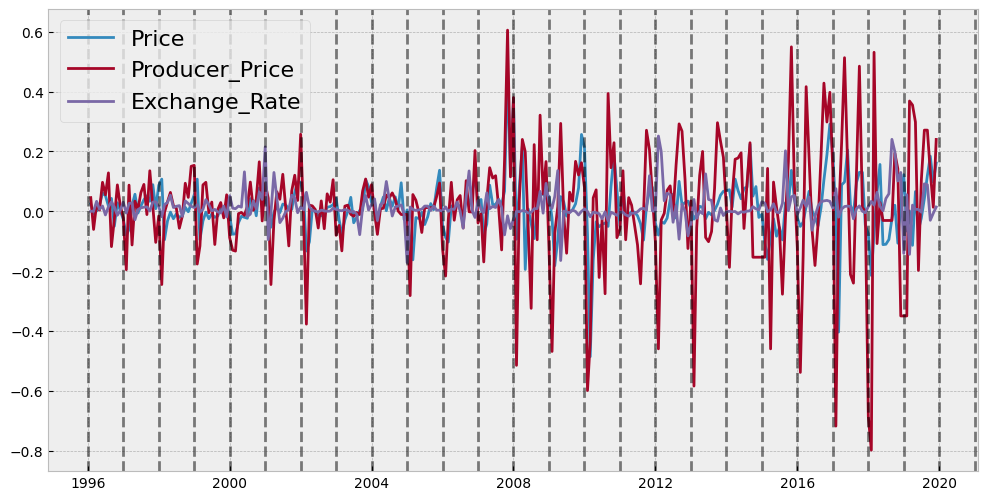

In [187]:
plot_all_series(series_to_merge)

<Axes: xlabel='Date'>

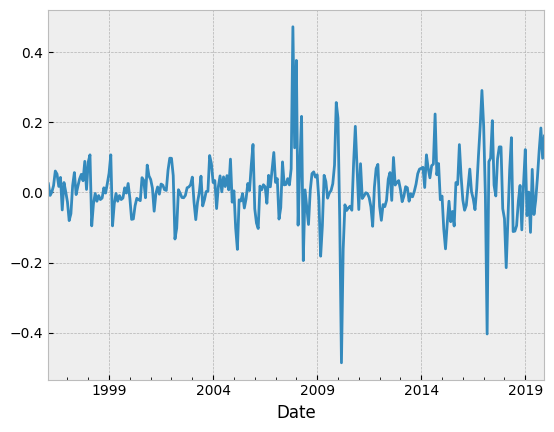

In [188]:
df['Price'].plot()

In [189]:
annual_volatility = df.groupby(df.index.year).std()
annual_volatility

,Price,Producer_Price,Exchange_Rate
Date,,,
1996,0.031059,0.072019,0.015427
1997,0.048924,0.096011,0.018149
1998,0.053331,0.096296,0.019828
1999,0.049396,0.096623,0.015522
2000,0.048182,0.086212,0.040084
2001,0.037166,0.105602,0.080877
2002,0.060962,0.145608,0.017796
2003,0.052919,0.064423,0.028984
2004,0.037054,0.043831,0.033267


In [190]:
for series in series_to_merge:
  df[series + '_Volume'] = df.index.map(lambda d: annual_volatility.loc[d.year, series])

df

,Price,Producer_Price,Exchange_Rate,Price_Volume,Producer_Price_Volume,Exchange_Rate_Volume
Date,,,,,,
1996-02-01,0.024871,0.045631,0.000000,0.031059,0.072019,0.015427
1996-03-01,-0.008290,-0.060579,0.000000,0.031059,0.072019,0.015427
1996-04-01,0.001184,0.023602,0.033195,0.031059,0.072019,0.015427
1996-05-01,0.019739,0.003934,0.006797,0.031059,0.072019,0.015427
1996-06-01,0.061191,0.096769,0.017546,0.031059,0.072019,0.015427
...,...,...,...,...,...,...
2019-08-01,0.042242,0.271032,0.091681,0.096791,0.262047,0.074651
2019-09-01,0.119224,0.271032,0.088520,0.096791,0.262047,0.074651
2019-10-01,0.183968,0.132172,-0.030034,0.096791,0.262047,0.074651


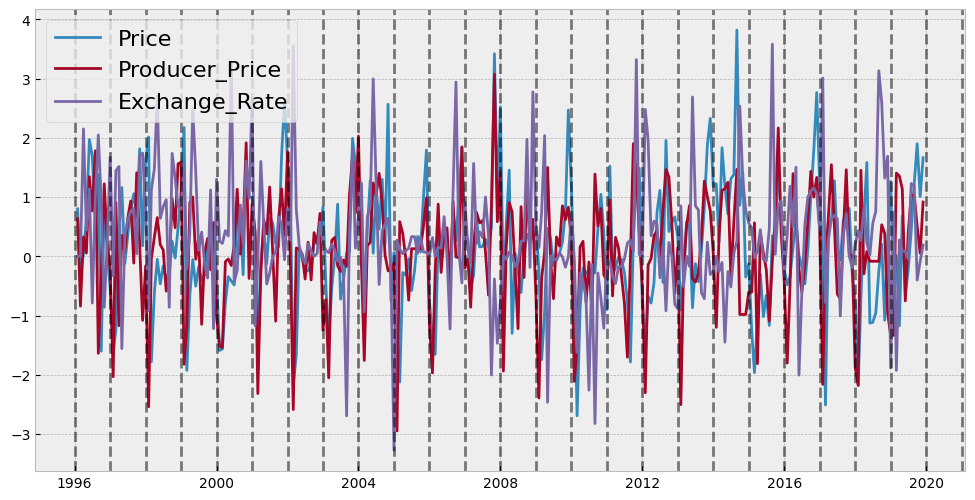

In [191]:
for series in series_to_merge:
  df[series] =  df[series] / df[series + '_Volume']

plot_all_series(series_to_merge)

<Axes: xlabel='Date'>

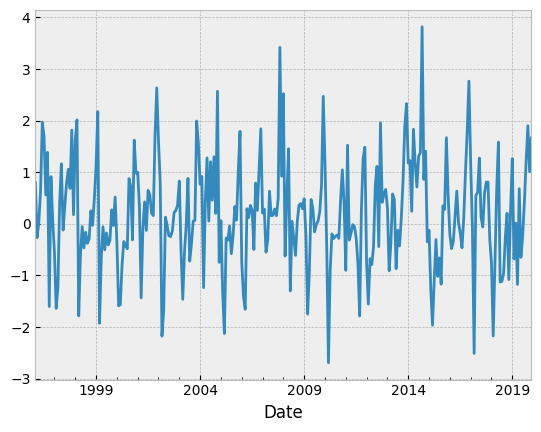

In [192]:
df['Price'].plot()

In [193]:
month_avgs = df.groupby(df.index.month).mean()
print(month_avgs)

         Price  Producer_Price  Exchange_Rate  Price_Volume  \
Date                                                          
1     0.475116       -0.058814       0.206271      0.079721   
2    -0.201715       -1.354259       0.416012      0.077693   
3    -1.165701       -0.482842       0.159888      0.077693   
4    -0.148418        0.268785       0.608909      0.077693   
5     0.290472        0.520742       0.223299      0.077693   
6     0.034217        0.104170       0.463989      0.077693   
7     0.052094       -0.001348      -0.008538      0.077693   
8    -0.080516        0.083371       0.235188      0.077693   
9     0.466911        0.170693       0.326446      0.077693   
10    0.350495        0.691133       0.555421      0.077693   
11    1.159595        0.717269       0.612184      0.077693   
12    0.951950        0.344065       0.247882      0.077693   

      Producer_Price_Volume  Exchange_Rate_Volume  
Date                                               
1            

In [194]:
for series in series_to_merge:
  df[series + '_Month_Avg'] = df.index.map(lambda d: month_avgs.loc[d.month, series])

df

,Price,Producer_Price,Exchange_Rate,Price_Volume,Producer_Price_Volume,Exchange_Rate_Volume,Price_Month_Avg,Producer_Price_Month_Avg,Exchange_Rate_Month_Avg
Date,,,,,,,,,
1996-02-01,0.800769,0.633592,0.000000,0.031059,0.072019,0.015427,-0.201715,-1.354259,0.416012
1996-03-01,-0.266923,-0.841148,0.000000,0.031059,0.072019,0.015427,-1.165701,-0.482842,0.159888
1996-04-01,0.038132,0.327720,2.151674,0.031059,0.072019,0.015427,-0.148418,0.268785,0.608909
1996-05-01,0.635531,0.054620,0.440581,0.031059,0.072019,0.015427,0.290472,0.520742,0.223299
1996-06-01,1.970146,1.343652,1.137313,0.031059,0.072019,0.015427,0.034217,0.104170,0.463989
...,...,...,...,...,...,...,...,...,...
2019-08-01,0.436418,1.034287,1.228127,0.096791,0.262047,0.074651,-0.080516,0.083371,0.235188
2019-09-01,1.231760,1.034287,1.185777,0.096791,0.262047,0.074651,0.466911,0.170693,0.326446
2019-10-01,1.900663,0.504384,-0.402317,0.096791,0.262047,0.074651,0.350495,0.691133,0.555421


In [195]:
for series in series_to_merge:
  df[series] = df[series] - df[series + '_Month_Avg']

df

,Price,Producer_Price,Exchange_Rate,Price_Volume,Producer_Price_Volume,Exchange_Rate_Volume,Price_Month_Avg,Producer_Price_Month_Avg,Exchange_Rate_Month_Avg
Date,,,,,,,,,
1996-02-01,1.002484,1.987851,-0.416012,0.031059,0.072019,0.015427,-0.201715,-1.354259,0.416012
1996-03-01,0.898778,-0.358306,-0.159888,0.031059,0.072019,0.015427,-1.165701,-0.482842,0.159888
1996-04-01,0.186550,0.058935,1.542765,0.031059,0.072019,0.015427,-0.148418,0.268785,0.608909
1996-05-01,0.345059,-0.466122,0.217282,0.031059,0.072019,0.015427,0.290472,0.520742,0.223299
1996-06-01,1.935929,1.239482,0.673324,0.031059,0.072019,0.015427,0.034217,0.104170,0.463989
...,...,...,...,...,...,...,...,...,...
2019-08-01,0.516934,0.950916,0.992938,0.096791,0.262047,0.074651,-0.080516,0.083371,0.235188
2019-09-01,0.764849,0.863595,0.859331,0.096791,0.262047,0.074651,0.466911,0.170693,0.326446
2019-10-01,1.550168,-0.186749,-0.957738,0.096791,0.262047,0.074651,0.350495,0.691133,0.555421


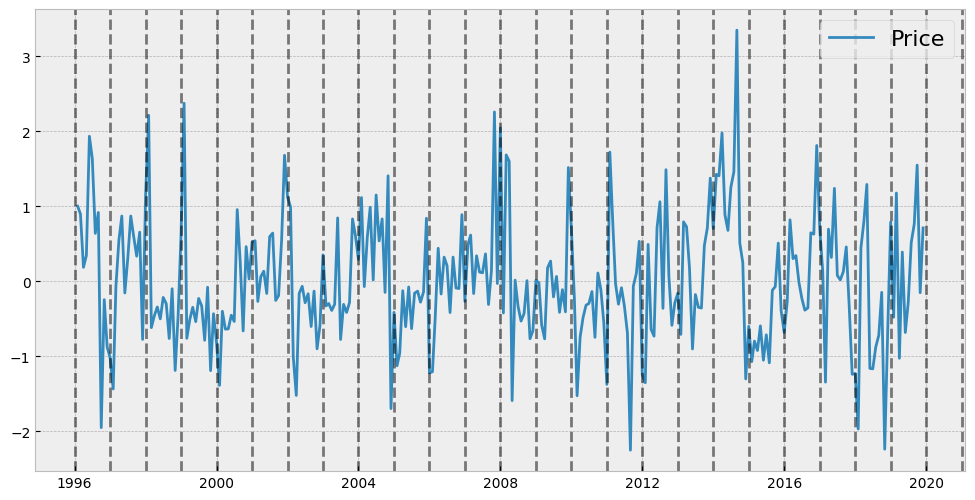

In [196]:
plot_all_series(['Price'])

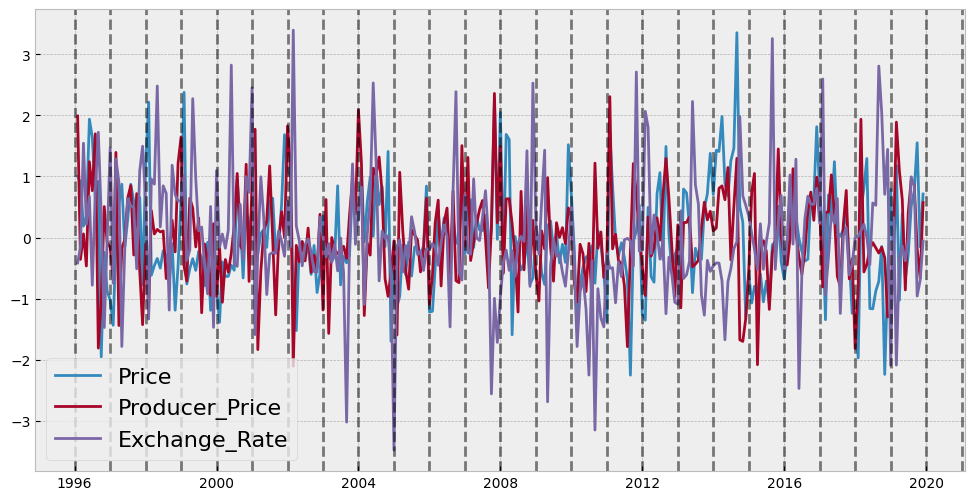

In [197]:
plot_all_series(series_to_merge)

In [203]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [205]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df[series_to_merge].iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8612
 No. Lags Chosen       = 1
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Producer_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.4787
 No. Lags Chosen       = 4
 Critical value 1%     = -3.454
 Critical value 5%     = -2.872
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Exchange_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significa

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


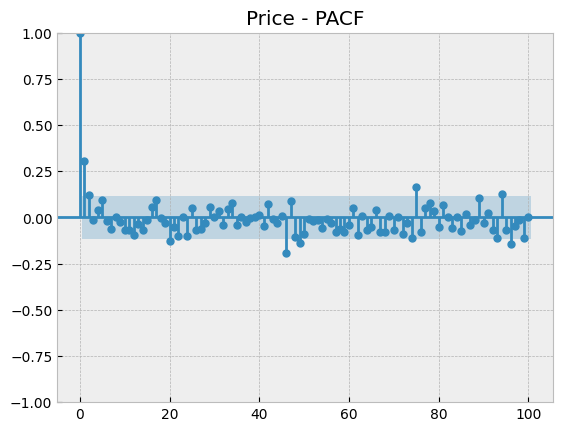

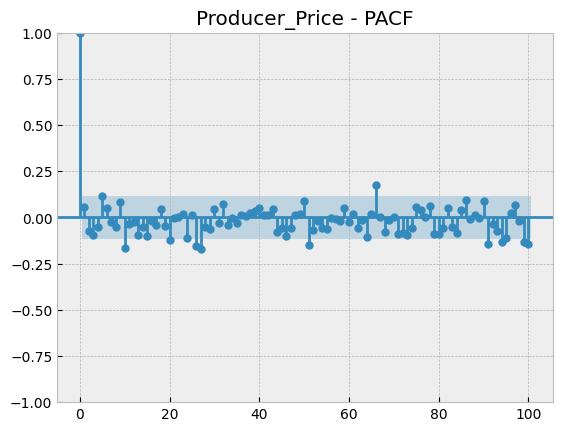

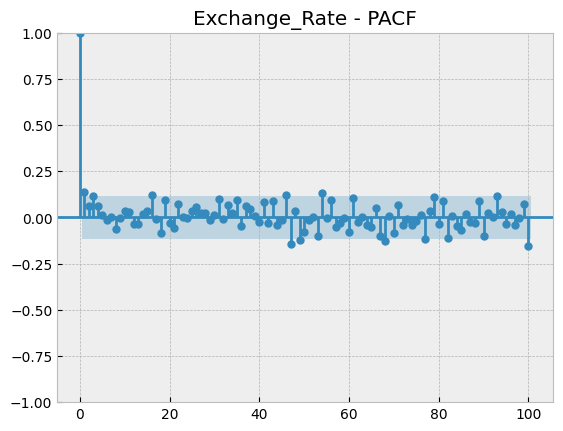

In [198]:
for series in series_to_merge:
  plot_pacf(df[series], lags = 100)
  plt.title(series + ' - PACF')
  plt.show()

In [208]:
train = df[series_to_merge].iloc[:-12, :]
val = df[series_to_merge].iloc[-12:, :]

In [212]:
model = VAR(train)
model_fit = model.fit(maxlags=12)
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Apr, 2023
Time:                     04:12:27
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.647461
Nobs:                     263.000    HQIC:                 -0.254294
Log likelihood:          -895.429    FPE:                   0.425478
AIC:                    -0.860178    Det(Omega_mle):        0.286669
--------------------------------------------------------------------
Results for equation Price
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.008549         0.047204           -0.181           0.856
L1.Price                   0.124715         0.073694            1.692           0.091
L1.Producer_Price          0.335665     

In [214]:
# Generate predictions for next 5 steps
forecast_input = val.values
forecast = model_fit.forecast(y=forecast_input, steps=12)

print(forecast)

[[-0.05597612 -0.07207024  0.29542336]
 [ 0.26782078  0.53658038 -0.13058854]
 [-0.00629309  0.0388061  -0.50196237]
 [ 0.28012171  0.26297678 -0.51062887]
 [ 0.12474588 -0.13000807 -0.30841743]
 [ 0.28913578 -0.10421647 -0.11166097]
 [-0.05851084 -0.42809366 -0.32418321]
 [-0.24294003 -0.11248037 -0.32599308]
 [-0.00504209  0.19253125  0.09102194]
 [-0.06948372 -0.0577489   0.32239638]
 [ 0.0120264  -0.032736    0.06266186]
 [-0.2787228  -0.29662201  0.08432372]]


In [247]:
import numpy as np

# Original time series
original_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Differenced series
differenced_series = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Invert differencing
inverted_series = np.cumsum(differenced_series) + original_series[0:-1]
inverted_series

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

In [245]:
df[series_to_merge][-1]

KeyError: ignored

In [234]:
forecast_df = pd.DataFrame()

for forecasted_row in forecast:
  # First apply inverse differencing
  # Assume original_data is a NumPy array with the last observation(s) of the original time series
  forecast_stn = np.cumsum(forecasted_row) + df[series_to_merge][-1]

  # Then apply inverse normalization
  # Assume mu and std are the mean and standard deviation of the original time series
  forecast_orig = forecast_stn * devs + avgs

  forecast_df = forecast_df.append(pd.DataFrame({'forecast': forecast_orig}))

  print(forecast_orig)

Price              68.325149
Producer_Price     29.102355
Exchange_Rate     113.481062
dtype: float64
Price              76.527094
Producer_Price     40.954394
Exchange_Rate     129.500300
dtype: float64
Price             69.583646
Producer_Price    31.143173
Exchange_Rate     93.337391
dtype: float64
Price              76.838683
Producer_Price     37.633060
Exchange_Rate     109.213761
dtype: float64
Price             72.902932
Producer_Price    30.663025
Exchange_Rate     98.264597
dtype: float64
Price              77.067014
Producer_Price     33.080360
Exchange_Rate     110.503962
dtype: float64
Price             68.260943
Producer_Price    24.544838
Exchange_Rate     82.540402
dtype: float64
Price             63.589255
Producer_Price    26.212277
Exchange_Rate     86.632682
dtype: float64
Price              69.615334
Producer_Price     33.113025
Exchange_Rate     116.996383
dtype: float64
Price              67.982994
Producer_Price     29.112698
Exchange_Rate     114.359995
dtype: 

<ipython-input-234-2f8556eed186>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_df = forecast_df.append(pd.DataFrame({'forecast': forecast_orig}))
<ipython-input-234-2f8556eed186>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_df = forecast_df.append(pd.DataFrame({'forecast': forecast_orig}))
<ipython-input-234-2f8556eed186>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_df = forecast_df.append(pd.DataFrame({'forecast': forecast_orig}))
<ipython-input-234-2f8556eed186>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_df = forecast_df.append(pd.DataFrame({'forecast': forecast_orig}))
<ipython

In [243]:
val.values

array([[ 0.78927314, -1.27520152, -2.09081017],
       [-0.47942382,  0.02024322,  0.32509888],
       [ 1.17793707,  1.88791147, -2.08677586],
       [-1.02624042,  1.08524563, -0.33363902],
       [ 0.39066698,  0.61712432, -0.13860071],
       [-0.68272655, -0.8577434 , -0.37929109],
       [-0.28457895,  0.40065245, -0.03381133],
       [ 0.51693449,  0.95091601,  0.99293849],
       [ 0.76484913,  0.86359464,  0.85933101],
       [ 1.55016758, -0.18674927, -0.95773841],
       [-0.15216275, -0.6662304 , -0.69688277],
       [ 0.7121492 ,  0.57163208, -0.05731058]])

In [ ]:
forecast_stn = np.cumsum(forecasted_row) + val[series_to_merge]

# Then apply inverse normalization
# Assume mu and std are the mean and standard deviation of the original time series
forecast_orig = forecast_stn * devs + avgs

print(forecast_orig)

In [244]:
for forecasted_row in val.values:
  # First apply inverse differencing
  # Assume original_data is a NumPy array with the last observation(s) of the original time series
  forecast_stn = np.cumsum(forecasted_row) + val[series_to_merge]

  # Then apply inverse normalization
  # Assume mu and std are the mean and standard deviation of the original time series
  forecast_orig = forecast_stn * devs + avgs

  print(forecast_orig)

                 Price  Producer_Price  Exchange_Rate
Date                                                 
2019-01-01   91.689345        1.078926     -37.641304
2019-02-01   59.552586       17.544906      38.777135
2019-03-01  101.534406       41.284234     -37.513694
2019-04-01   45.701436       31.081808      17.940373
2019-05-01   81.592442       25.131669      24.109696
2019-06-01   54.402822        6.385102      16.496337
2019-07-01   64.488109       22.380165      27.424324
2019-08-01   84.790864       29.374387      59.901797
2019-09-01   91.070672       28.264474      55.675613
2019-10-01  110.963199       14.913892      -1.800727
2019-11-01   67.842281        8.819362       6.450486
2019-12-01   89.735755       24.553432      26.681011
                Price  Producer_Price  Exchange_Rate
Date                                                
2019-01-01  59.552586        1.418909      39.623203
2019-02-01  27.415828       17.884888     116.041642
2019-03-01  69.397647       41.6